- Task: Rainfall Prediction for tomorrow
- Model: Decision tree and ensemble learning by Random forest
- Data: Rainfall in Australia (https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Machine learning/dataset/weatherAUS.csv'
df = pd.read_csv(file_path)
df.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No


**Initial discovery of the data**

In [ ]:
df.shape

(145460, 23)

In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


**EDA of different features:-**

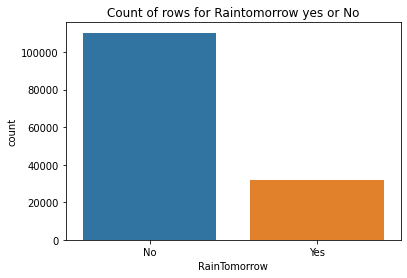

In [ ]:
# RainTomorrow

plt.title('Count of rows for Raintomorrow yes or No')
sns.countplot(x=df['RainTomorrow'])
plt.show()

Observation:-The data is clearly imbalanced as No of RainTomorrow-No is much higher than RainTomorrow-Yes

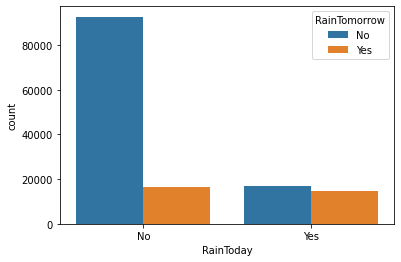

In [ ]:
# RainToday

plt.title('')
sns.countplot(x=df['RainToday'],hue= df['RainTomorrow'])
plt.show()

In [ ]:
x = pd.crosstab(df['RainTomorrow'],df['RainToday'])
x

RainToday,No,Yes
RainTomorrow,,
No,92728,16858
Yes,16604,14597


In [ ]:
y = (x/x.sum().values*100).round(2)
y

RainToday,No,Yes
RainTomorrow,,
No,84.81,53.59
Yes,15.19,46.41


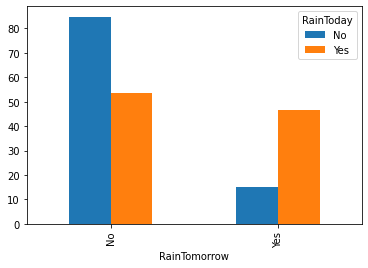

In [ ]:
y.plot(kind='bar')

Observation:-When it does not rain today it is more likely to not rain tomorrow, but if it rains today there is almost a 50-50 chance of raining tomorrow.

If its not raining today chance of not raining tomorrow is 85% and raining tomorrow is 15%.

In [ ]:
# Location

loc = pd.crosstab(df['Location'],df['RainTomorrow'])
loc_prec = (loc/loc.transpose().sum().values.reshape(-1,1)*100).round(2)
loc_sort = loc_prec.sort_values('Yes',ascending=True)

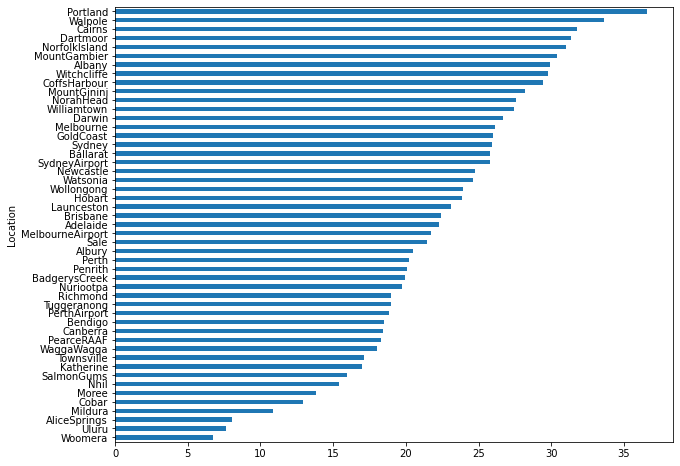

In [ ]:
loc_sort['Yes'].plot(kind='barh',figsize=(10,8))
plt.show()

Location has an impact on raintomorrow.In Woomera it rains for 6% of days where in Portland its more than 35%.

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


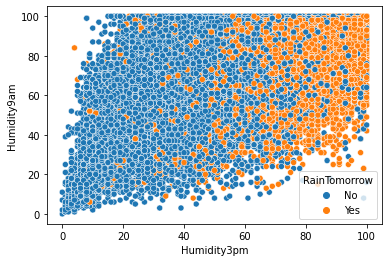

<Figure size 1080x576 with 0 Axes>

In [ ]:
# Humidity

sns.scatterplot(x=df['Humidity3pm'],y=df['Humidity9am'],hue=df['RainTomorrow'])
plt.figure(figsize=(15,8))
plt.show()

Observation:-When humidity at 3 pm increases the chance of raintomorrow increases.

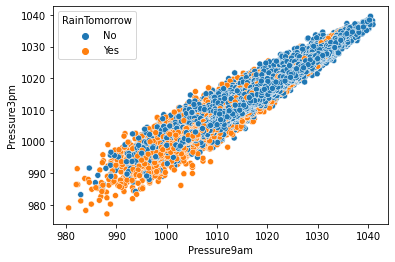

<Figure size 1080x576 with 0 Axes>

In [ ]:
# Pressure

sns.scatterplot(data=df,x='Pressure9am',y='Pressure3pm',hue=df['RainTomorrow'])
plt.figure(figsize=(15,8))
plt.show()

Observation:-Low pressure increases chance of rain tomorrow.

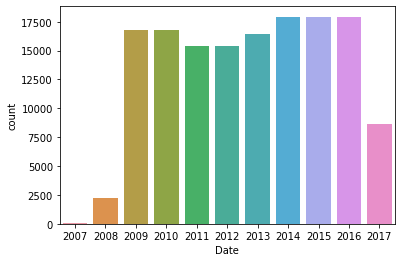

In [ ]:
# Year and month

year = pd.to_datetime(df['Date']).dt.year
sns.countplot(data=df[df['RainTomorrow']=='yes'],x=year)
plt.show()

Observation:- year 2014,2015 and 2016 have the highest rainfall

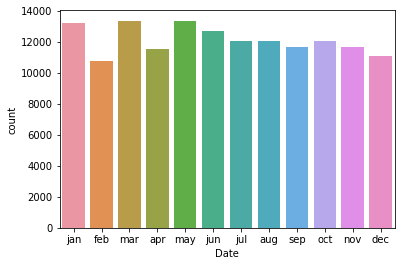

<Figure size 1440x576 with 0 Axes>

In [ ]:
fig, ax = plt.subplots()
order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
month = pd.to_datetime(df['Date']).dt.month
sns.countplot(data=df[df['RainTomorrow']=='yes'],x=month)
ax.set_xticks(range(0,len(order)))
ax.set_xticklabels(order, rotation='horizontal')
plt.figure(figsize=(20,8))
plt.show()


Observation:- May, june are the rain prone months

<Figure size 1008x576 with 0 Axes>

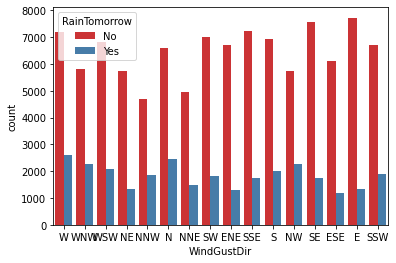

<Figure size 1008x576 with 0 Axes>

In [ ]:
sns.countplot(data=df,x='WindGustDir',hue='RainTomorrow',palette='Set1')
plt.figure(figsize=(14,8))
# sns.countplot(data=data,x='WindGustDir',hue='RainTomorrow',palette='Set1');

**Feature Engineering:-**

In [ ]:
# As the data contains date column it is useful to train the data on past and then validate and test on future to avoid biased training. So splitted the
# data basedon date(year).

train_df = df[pd.to_datetime(df['Date']).dt.year<2015]
val_df = df[pd.to_datetime(df['Date']).dt.year == 2015]
test_df = df[pd.to_datetime(df['Date']).dt.year>2015]

In [ ]:
print(pd.to_datetime(train_df['Date']).dt.year.unique())
print(pd.to_datetime(val_df['Date']).dt.year.unique())
print(pd.to_datetime(test_df['Date']).dt.year.unique())

[2008 2009 2010 2011 2012 2013 2014 2007]
[2015]
[2016 2017]


In [ ]:
# creating the target column as a seperate dataframe

train_target = train_df.iloc[:,-1]
val_target = val_df.iloc[:,-1]
test_target = test_df.iloc[:,-1]


In [ ]:
# We want use all the columns except the Date column to predict whether it will rain tomorrow in Australia.

train_df = train_df.drop(['Date','RainTomorrow'],axis=1)
val_df = val_df.drop(['Date','RainTomorrow'],axis=1)
test_df = test_df.drop(['Date','RainTomorrow'],axis=1)


In [ ]:
print(train_df.shape,train_target.shape)
print(val_df.shape,val_target.shape)
print(test_df.shape,test_target.shape)

(101018, 21) (101018,)
(17885, 21) (17885,)
(26557, 21) (26557,)


In [ ]:
# Finding the numeric and categorical columns for better preprocessing

numerical_col = train_df.select_dtypes(include=np.number).columns.tolist()
categorical_col = train_df.select_dtypes(include='object').columns.tolist()
print(numerical_col)
print(categorical_col)
train_df[numerical_col].columns.values.tolist()

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [ ]:
missing_prec = train_df[numerical_col].isnull().sum()/len(train_df[numerical_col])*100
missing_prec.sort_values(ascending=False)

Sunshine         41.584668
Evaporation      38.098161
Cloud3pm         37.745748
Cloud9am         36.731078
Pressure9am       9.701241
Pressure3pm       9.667584
WindGustSpeed     7.546180
Rainfall          2.010533
Humidity9am       1.573977
Humidity3pm       1.488844
WindSpeed3pm      1.447267
WindSpeed9am      1.439347
Temp9am           1.093864
Temp3pm           0.968144
MinTemp           0.728583
MaxTemp           0.528619
dtype: float64

In [ ]:
# Handling missing values for numerical data using mean

from sklearn.impute import SimpleImputer

In [ ]:
imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit(df[numerical_col])

SimpleImputer()

In [ ]:
train_df[numerical_col] = imp_mean.transform(train_df[numerical_col])
val_df[numerical_col] = imp_mean.transform(val_df[numerical_col])
test_df[numerical_col] = imp_mean.transform(test_df[numerical_col])

In [ ]:
train_df[numerical_col].isna().sum().any()

False

In [ ]:
# scaling the numerical data

train_df[numerical_col].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000
mean,11.993708,22.982556,2.381165,5.353008,7.601115,40.248486,14.126682,18.776147,68.697168,51.552246,1017.533168,1015.154838,4.364737,4.454915,16.814342,21.507842
std,6.313387,6.975608,8.432540,3.108422,2.897064,13.201832,8.943325,8.817635,18.831528,20.584602,6.723903,6.652154,2.281705,2.125898,6.358405,6.799765
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,979.000000,0.000000,0.000000,-5.900000,-5.100000
25%,7.500000,17.900000,0.000000,3.800000,7.500000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.400000,1011.000000,3.000000,3.000000,12.200000,16.600000
50%,11.800000,22.400000,0.000000,5.468232,7.611178,39.000000,13.000000,19.000000,69.000000,52.000000,1017.649940,1015.255889,4.447461,4.509930,16.600000,21.000000
75%,16.500000,27.800000,1.000000,5.468232,9.200000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.700000,1019.300000,6.000000,6.000000,21.200000,26.100000
max,33.900000,48.100000,371.000000,82.400000,14.300000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.100000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[numerical_col])

MinMaxScaler()

In [ ]:
train_df[numerical_col] = scaler.transform(train_df[numerical_col])
val_df[numerical_col] = scaler.transform(val_df[numerical_col])
test_df[numerical_col] = scaler.transform(test_df[numerical_col])

In [ ]:
train_df[numerical_col].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000,101018.000000
mean,0.483342,0.525190,0.006418,0.036917,0.524215,0.265492,0.108667,0.215818,0.686972,0.515522,0.612118,0.608877,0.484971,0.494991,0.506632,0.516465
std,0.148901,0.131864,0.022729,0.021437,0.199797,0.102340,0.068795,0.101352,0.188315,0.205846,0.111139,0.106434,0.253523,0.236211,0.134144,0.130514
min,0.000000,0.013233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030400,0.000000,0.000000,0.027426,0.005758
25%,0.377358,0.429112,0.000000,0.026207,0.517241,0.193798,0.053846,0.149425,0.570000,0.370000,0.543802,0.542400,0.333333,0.333333,0.409283,0.422265
50%,0.478774,0.514178,0.000000,0.037712,0.524909,0.255814,0.100000,0.218391,0.690000,0.520000,0.614049,0.610494,0.494162,0.501103,0.502110,0.506718
75%,0.589623,0.616257,0.002695,0.037712,0.634483,0.310078,0.146154,0.275862,0.830000,0.650000,0.680992,0.675200,0.666667,0.666667,0.599156,0.604607
max,1.000000,1.000000,1.000000,0.568276,0.986207,1.000000,0.669231,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988484


In [ ]:
# One hot encoding of categorical data

train_df[categorical_col][:2]

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,Albury,W,W,WNW,No
1,Albury,WNW,NNW,WSW,No


In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(df[categorical_col])

OneHotEncoder()

In [ ]:
encoded_col = list(ohe.get_feature_names_out())


In [ ]:
train_df[encoded_col] = ohe.transform(train_df[categorical_col]).toarray()
val_df[encoded_col] = ohe.transform(val_df[categorical_col]).toarray()
test_df[encoded_col] = ohe.transform(test_df[categorical_col]).toarray()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at o

In [ ]:
train_df[encoded_col][:2]

,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,...,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [ ]:
train_df[numerical_col].shape

(101018, 16)

In [ ]:
# prepare final training data and data for evaluation

x_train = train_df[numerical_col+encoded_col]
x_val = val_df[numerical_col+encoded_col]
x_test = test_df[numerical_col+encoded_col]

In [ ]:
print(x_train.shape,train_target.shape)
print(x_val.shape,val_target.shape)
print(x_test.shape,test_target.shape)

(101018, 119) (101018,)
(17885, 119) (17885,)
(26557, 119) (26557,)


In [ ]:
train_target[:2]

0    No
1    No
Name: RainTomorrow, dtype: object

In [ ]:
train_target = train_target.fillna('unknown')
val_target = val_target.fillna('unknown')
test_target = test_target.fillna('unknown')

In [ ]:
train_target.isna().sum().any()

False

**Training model**

In [ ]:
# model training

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)


In [ ]:
%%time

model.fit(x_train,train_target)

CPU times: user 3.51 s, sys: 19 ms, total: 3.53 s
Wall time: 3.55 s


DecisionTreeClassifier(random_state=42)

In [ ]:
# Accuracy of the model

from sklearn.metrics import accuracy_score
def acc_cal(model,x,y):
  pred = model.predict(x)
  acc = accuracy_score(y, pred)
  return acc

In [ ]:
print('Training accuracy:',acc_cal(model,x_train,train_target))
print('Training accuracy:',acc_cal(model,x_val,val_target))
print('Training accuracy:',acc_cal(model,x_test,test_target))

Training accuracy: 0.9999307054188362
Training accuracy: 0.761420184512161
Training accuracy: 0.7448130436419776


Observation:- The model somehow overfits as training accuracy is very high where validation set accuracy is less than 80%. So model's generalization capability is less.

In [ ]:
# visualize tree

from sklearn import tree
from sklearn.tree import plot_tree
def visualize(model):
  plt.figure(figsize=(70,40))
  plot_tree(model, feature_names=x_train.columns, filled=True, rounded=True, class_names=model.classes_);
  plt.show()

**Feature importance**

In [ ]:
x_train.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
       'WindDir3pm_WNW', 'WindDir3pm_WSW', 'WindDir3pm_nan', 'RainToday_No',
       'RainToday_Yes', 'RainToday_nan'],
      dtype='object', length=119)

In [ ]:
# finding the most important feature

m = max(model.feature_importances_.tolist())
l = model.feature_importances_.tolist()
for i in range(len(l)):
  if l[i] == m:
    print(i,l[i])
    print(x_train.columns[i])

9 0.2387784924232579
Humidity3pm


In [ ]:
# dataframe with features and weights

data_feature_imp = pd.DataFrame({'Columns': x_train.columns,'Weights':l})
data_feature_imp_sorted = data_feature_imp.sort_values(by='Weights',ascending=False,ignore_index=True)[:10]

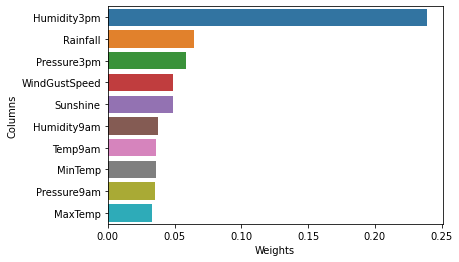

In [ ]:
# plotting the features based on their importance

sns.barplot(data=data_feature_imp_sorted,x='Weights',y='Columns')
plt.show()

**Regularization to reduce the overfitting**

In [ ]:
?DecisionTreeClassifier

tuning the hyperparameters-
- max depth
- max leaf nodes

In [ ]:
# initial max_depth of our model

model.tree_.max_depth

45

In [ ]:
model_1 = DecisionTreeClassifier(random_state=42,max_depth=3)
model_1.fit(x_train,train_target)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
print('Training accuracy:',acc_cal(model,x_train,train_target))
print('validation accuracy:',acc_cal(model,x_val,val_target))


Training accuracy: 0.9999307054188362
validation accuracy: 0.761420184512161


Observation:- model is 82% accurate on training and almost same on validation. so overfitting is reduced as the modelis no longer memorizing everything.

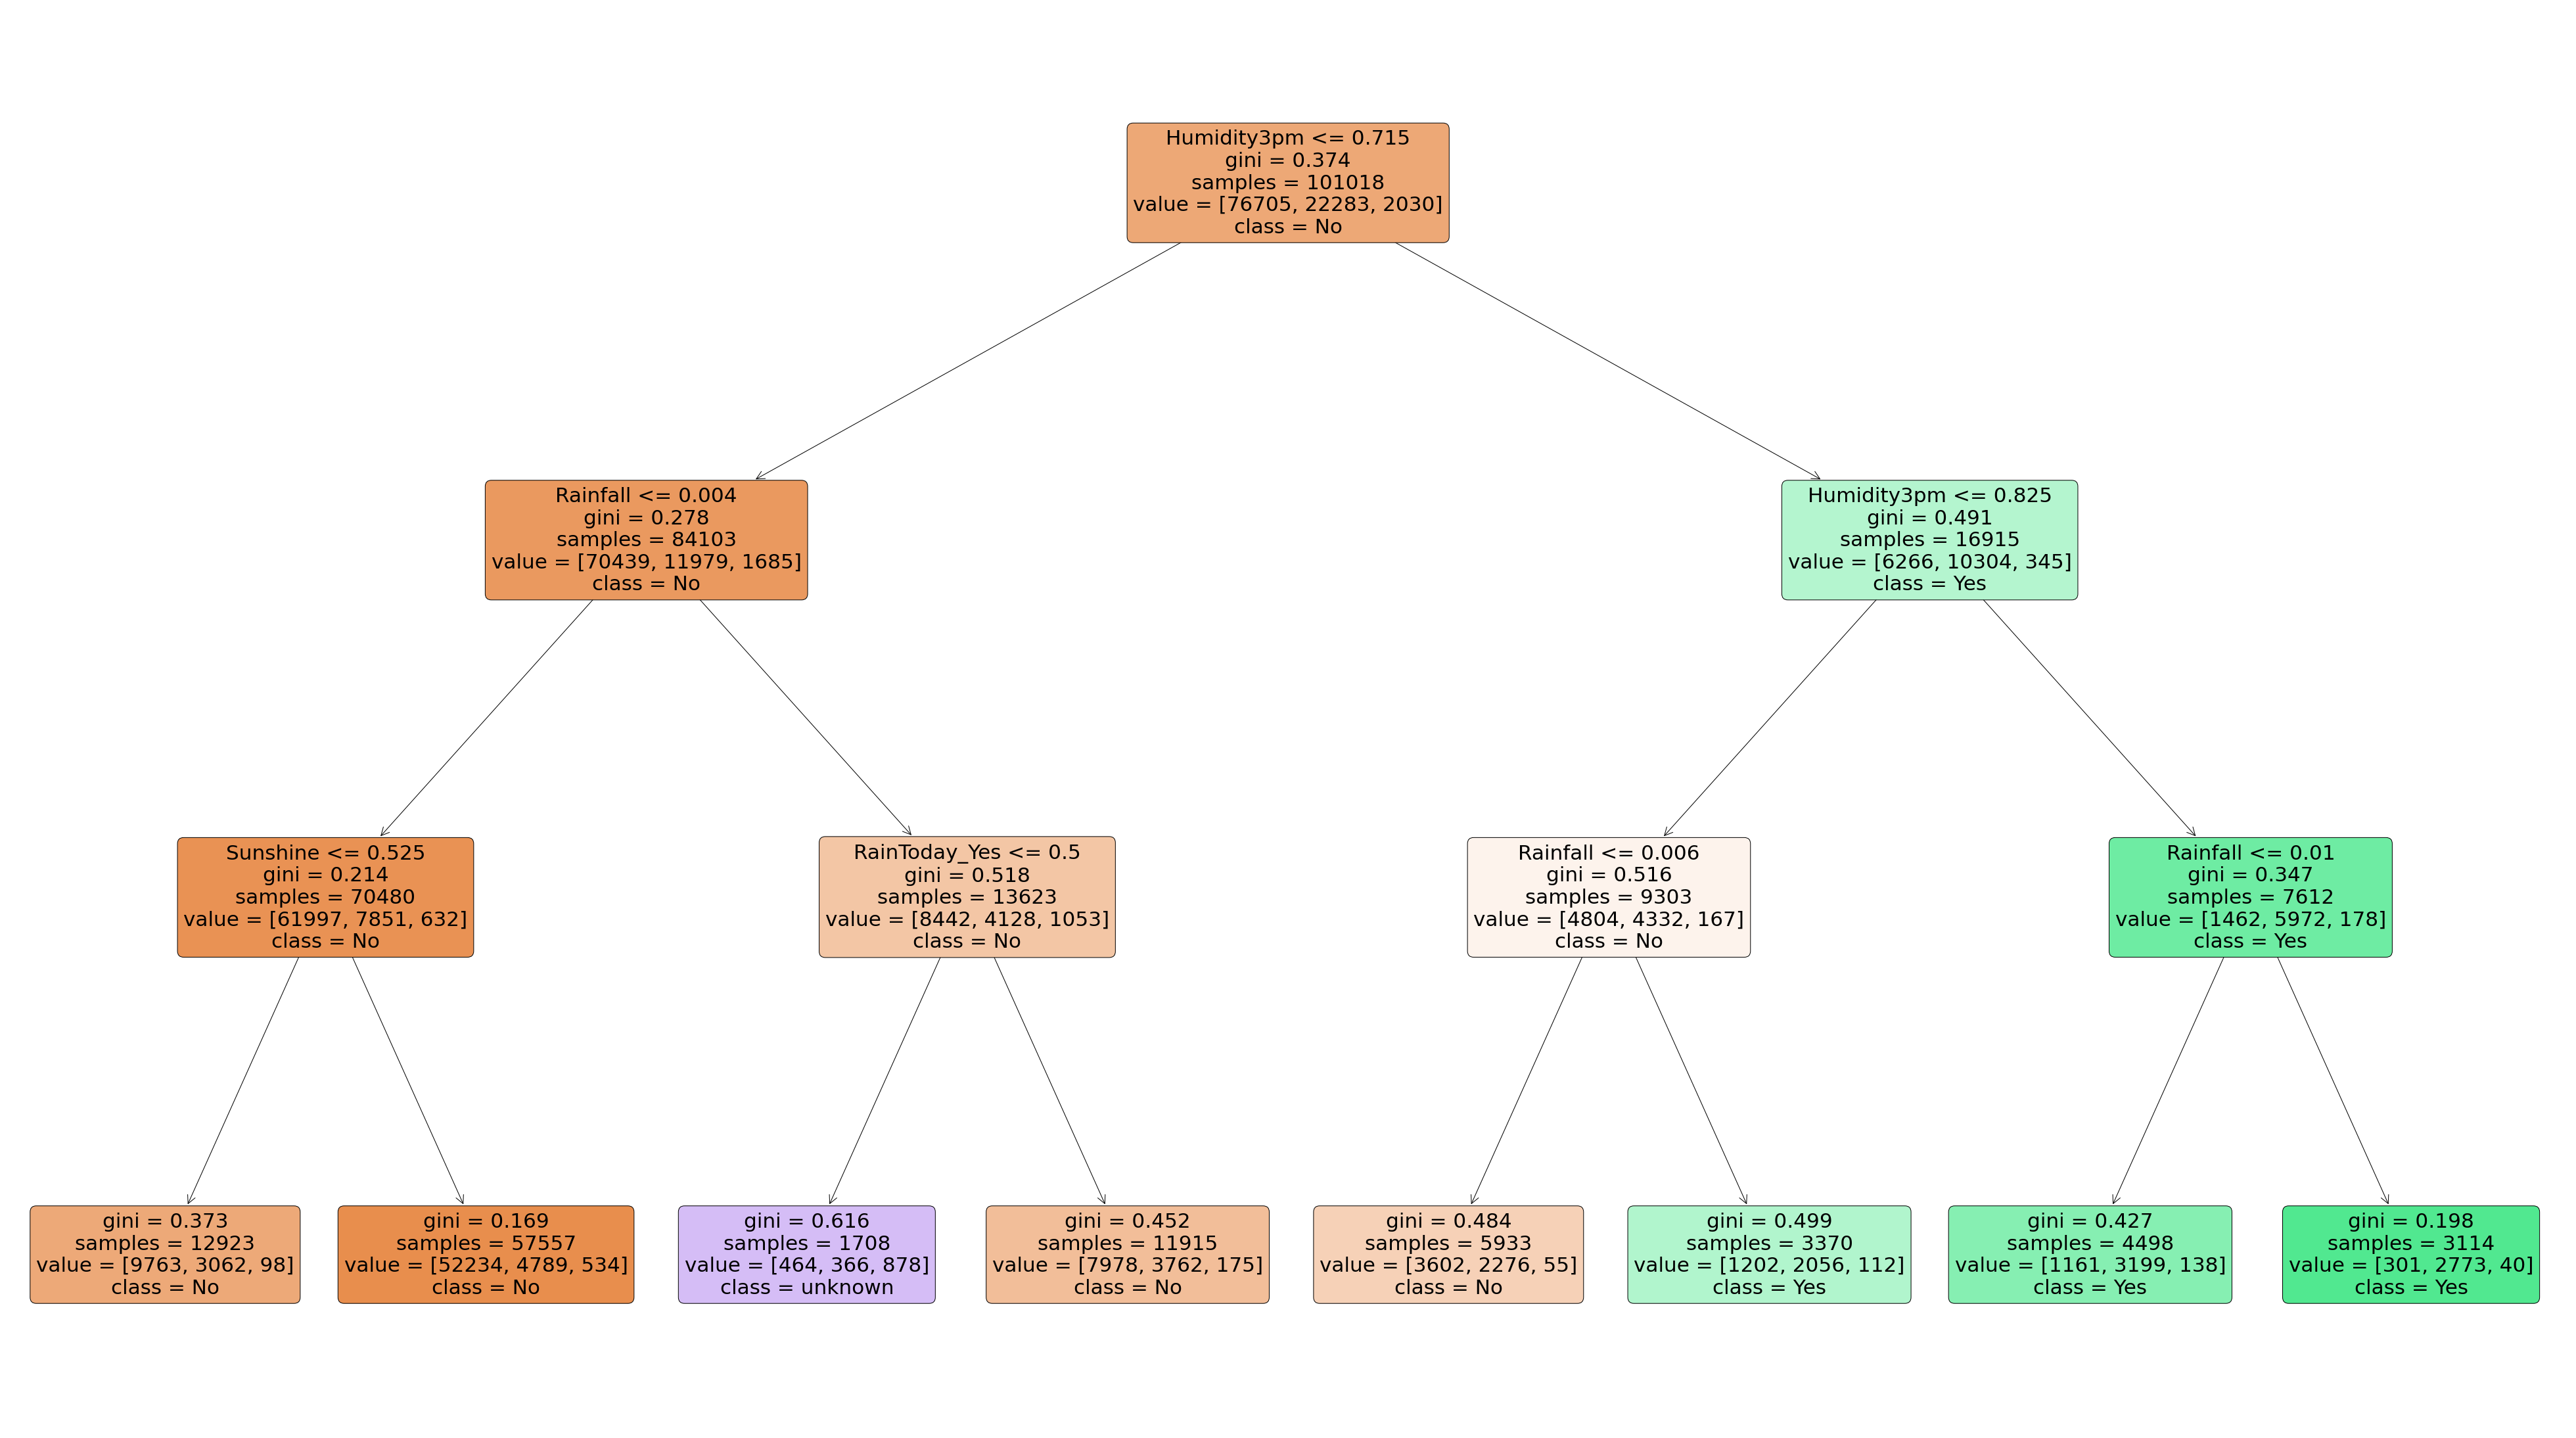

In [ ]:
visualize(model_1)

**Determining the good max_depth to avoid overfitting**

In [ ]:
def error_cal(x,y,val,val_test,max_depth):
  model = DecisionTreeClassifier(random_state=42,max_depth=max_depth)
  model.fit(x,y)
  train_score = model.score(x,y)
  val_score = model.score(val,val_test)
  print('Training accuracy:',train_score,'Validation accuracy:',val_score)
  train_error = 1-train_score
  val_error = 1-val_score
  return {'max_depth':max_depth,'training_error':train_error,'validation_error':val_error}


In [ ]:
error_cal(x_train,train_target,x_val,val_target,2)

Training accuracy: 0.8039656298877428 Validation accuracy: 0.7970366228683254


{'max_depth': 2,
 'training_error': 0.19603437011225722,
 'validation_error': 0.20296337713167456}

In [ ]:
df_error = pd.DataFrame([error_cal(x_train,train_target,x_val,val_target,i) for i in range(1,21) ])

In [ ]:
df_error

,max_depth,training_error,validation_error
0,1,0.200707,0.207996
1,2,0.196034,0.202963
2,3,0.183482,0.174336
3,4,0.182314,0.174951
4,5,0.173761,0.169080
5,6,0.169128,0.167682
6,7,0.165565,0.166229
7,8,0.159724,0.166173
8,9,0.152587,0.170534
9,10,0.144083,0.172770


Observation:- The validation error and training error decreases till depth=7, where training error keeps on decreasing and validation error starts to increase at max_depth=8. So the ideal max_depth to consider would be 7.

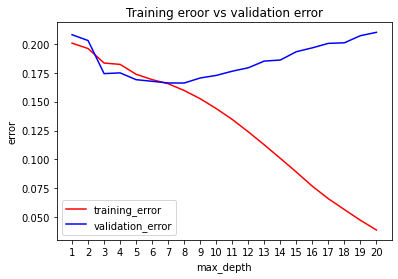

In [ ]:
plt.plot(df_error['max_depth'],df_error['training_error'],color='red')
plt.plot(df_error['max_depth'],df_error['validation_error'],color='blue')
plt.xticks(range(1,21))
plt.xlabel('max_depth')
plt.ylabel('error')
plt.legend(['training_error','validation_error'])
plt.title('Training eroor vs validation error')
plt.show()

In [ ]:
# training on the new max_depth

error_cal(x_train,train_target,x_val,val_target,7)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_jobs=-1,random_state=42)

rf.fit(x_train,train_target)


RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
rf.score(x_train,train_target)

0.9999109069670752

In [ ]:
rf.score(x_val,val_target)

0.8404249370981269

In [ ]:
rf.predict_proba(x_train)

array([[0.91, 0.08, 0.01],
       [1.  , 0.  , 0.  ],
       [0.97, 0.03, 0.  ],
       ...,
       [0.99, 0.  , 0.01],
       [1.  , 0.  , 0.  ],
       [0.95, 0.05, 0.  ]])

In [ ]:
train_target[0]

'No'